In [3]:
#in this cell I set the filename of the data

%matplotlib inline
import sys
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

ifname = 'abalone.csv'

In [10]:
#In this cell the data is imported from the file and standardised

data = pd.read_csv(ifname)
for i in range(len(data)):
    inti = int(data.iloc[i,8])
    if inti>10:
        data.iloc[i,8] = 1
    else:
        data.iloc[i,8] = 0
            #one hot vecotor for 'sex' category 
data_dummies = pd.get_dummies(data)
data_Rings = data.Rings
data_dummies = data_dummies.drop('Rings',axis=1)
data_dummies.insert(10,'Rings',data_Rings)
data = data_dummies
header = data[1:1]
#    with open(ifname, 'r') as ifile:
#            datareader = csv.reader(ifile, delimiter=',')
#                #Encoding rings into two classes: larger than 10 as 1, smaller or equal than 10 as 0 
#
#            #Assume the first row is the header
#            
#            data = []
#            for row in datareader:
#                row_of_floats = list(map(float,row))
#                data.append(row_of_floats)
data_as_array = np.array(data)

targets = data_as_array[:,-1]
data_matrix = data_as_array[:, 0:-1] #data_matrix is a 2D array which can be used to represent all the datapoints where is row is a datapoint
N = data_matrix.shape[0] 
Dim = data_matrix.shape[1]
    #standardising data below
standardised_data = np.zeros([N , Dim])
for i in range(Dim): 
    column_i = data_matrix[:,i]
    column_i_mean = np.mean(column_i)
    colum_i_std = np.std(column_i)
    standardised_data[:,i] = (column_i - column_i_mean) / colum_i_std

In [11]:
#This tells us how many 1s
print('the number of 1s is {}'.format(np.sum(targets)))

the number of 1s is 1447.0


In [13]:
#In the following cells  we will run fischers linear discriminant on the data in it standardised form without 
# the use of basis functions. Its performance will be asessed using cross validation and ROC

#This cell will import and define the functions needed to do this

from fomlads.model.classification import fisher_linear_discriminant_projection
from fomlads.model.classification import project_data
from fomlads.plot.exploratory import plot_class_histograms
from fomlads.plot.evaluations import plot_roc

def fischerpredicts(w0, projected_inputs):
    
    #This function takes a value of w0 and applies it to projected inputs.
    #w0 is the "threshold" or "cutoff" used to predict class membership
    #projected_inputs is what you get when multiplying the weights (found by fishers) by the inputs, it is 1D
    #predicts is a vecor where each  number is 1 or 0
    N = projected_inputs.shape[0]
    predicts = np.zeros([N])
    for i in range(N):
        if projected_inputs[i] > w0:
            predicts[i] = 1
            
    return predicts

In [14]:
#Below we return the weights for fischers linear discriminant where the input data is s a standarsided matrix with
#no Basis functions

weights = fisher_linear_discriminant_projection(standardised_data, targets)

#Below we use these weights to project the data into one dimension and the result is a one dimensional vector called 
#projected_inputs, this can then be used to visualise the data as a histogram to see how seperable it is

projected_data = project_data(standardised_data, weights)

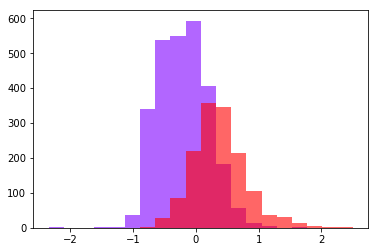

In [15]:
#Below is a histogram to show how linearly seperable the data is


plot_class_histograms(projected_data, targets)


In [16]:
#In this cell we obtain all the data we need to construct the ROC curve

new_ordering = np.argsort(projected_data)
sorted_projections = projected_data[new_ordering]
sorted_targets = targets[new_ordering]

num_neg = np.sum(1-targets)
num_pos = np.sum(targets)

#Below is a 2D array with 5 colums. The array is alled roc_data
#Column 1 is numbers in ascending order (ie 1, 2, 3, 4, 5 etc)
#Column 2 is a value of w0
#Column 3 is the false positive rate (FPR) for a given value of w0
#Column 4 is the true positive rate (TPR) for a given value of 
#Column 5 gives the value of TPR - FPR


roc_data = np.empty([N, 5])

for i, w0 in enumerate(sorted_projections):
        roc_data[i,0] = i
        roc_data[i,1] = sorted_projections[i]
        roc_data[i,2] = np.sum(1-sorted_targets[i:])/num_neg
        FPR = roc_data[i,2]
        roc_data[i,3] = np.sum(sorted_targets[i:])/num_pos
        TPR = roc_data[i,3]
        roc_data[i,4] = TPR - FPR


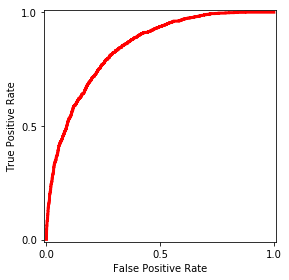

In [17]:
#In this cell we actully plot the roc curve using the data 
#from the roc_data array

plot_roc(roc_data[:,2], roc_data[:,3])

plt.show()

In [18]:
#In this cell we find the value of w0 which gives the best performance 
#(ie which gives the higest number for TPR - FPR

highest_value_indicies = np.argmax(roc_data, axis=0)
print('the best w0 is {0}'.format(roc_data[highest_value_indicies[4], 1]))

w0 = roc_data[highest_value_indicies[4], 1]

predictions = fischerpredicts(w0, projected_data)

the best w0 is 0.03279307148537797


In [19]:
#Run tbhis cell if you want to see how the predictions using finschers and w0 compares to the actual targets
for i in range(N):
    pred = predictions[i]
    actual = targets[i]
    print('at {0}, prediction = {1}, actual = {2}'.format(i, pred, actual))

at 0, prediction = 0.0, actual = 1.0
at 1, prediction = 0.0, actual = 0.0
at 2, prediction = 1.0, actual = 0.0
at 3, prediction = 0.0, actual = 0.0
at 4, prediction = 0.0, actual = 0.0
at 5, prediction = 0.0, actual = 0.0
at 6, prediction = 1.0, actual = 1.0
at 7, prediction = 1.0, actual = 1.0
at 8, prediction = 0.0, actual = 0.0
at 9, prediction = 1.0, actual = 1.0
at 10, prediction = 1.0, actual = 1.0
at 11, prediction = 0.0, actual = 0.0
at 12, prediction = 1.0, actual = 1.0
at 13, prediction = 1.0, actual = 0.0
at 14, prediction = 0.0, actual = 0.0
at 15, prediction = 1.0, actual = 1.0
at 16, prediction = 0.0, actual = 0.0
at 17, prediction = 0.0, actual = 0.0
at 18, prediction = 0.0, actual = 0.0
at 19, prediction = 0.0, actual = 0.0
at 20, prediction = 0.0, actual = 1.0
at 21, prediction = 0.0, actual = 0.0
at 22, prediction = 1.0, actual = 1.0
at 23, prediction = 0.0, actual = 0.0
at 24, prediction = 1.0, actual = 0.0
at 25, prediction = 1.0, actual = 1.0
at 26, prediction = 1.

at 3333, prediction = 0.0, actual = 1.0
at 3334, prediction = 0.0, actual = 0.0
at 3335, prediction = 0.0, actual = 1.0
at 3336, prediction = 0.0, actual = 1.0
at 3337, prediction = 1.0, actual = 1.0
at 3338, prediction = 1.0, actual = 1.0
at 3339, prediction = 1.0, actual = 1.0
at 3340, prediction = 0.0, actual = 1.0
at 3341, prediction = 1.0, actual = 1.0
at 3342, prediction = 0.0, actual = 1.0
at 3343, prediction = 0.0, actual = 1.0
at 3344, prediction = 0.0, actual = 1.0
at 3345, prediction = 1.0, actual = 1.0
at 3346, prediction = 1.0, actual = 1.0
at 3347, prediction = 0.0, actual = 1.0
at 3348, prediction = 0.0, actual = 1.0
at 3349, prediction = 0.0, actual = 0.0
at 3350, prediction = 0.0, actual = 1.0
at 3351, prediction = 0.0, actual = 1.0
at 3352, prediction = 1.0, actual = 1.0
at 3353, prediction = 0.0, actual = 0.0
at 3354, prediction = 0.0, actual = 0.0
at 3355, prediction = 0.0, actual = 0.0
at 3356, prediction = 0.0, actual = 0.0
at 3357, prediction = 0.0, actual = 0.0


In [21]:
#Below we will use cross validation in order to find the average minimum misclassification of the model we have found 
#By model I am reffering to the the use of fischers and the value of w0 we have selected above

#In this cell we define/import the functions needed for the cross validation

from t3.regression_train_test import create_cv_folds
from t3.regression_train_test import train_and_test_partition
from fomlads.evaluate.eval_classification import misclassification_error



def cross_val_fishers(w0, inputs, targets, folds):
    #this function performs a cross validation on the fischers model we hav created above
    #w0 = the threshold value we found to be the besdt cutoff to identify class memebership from the projected data vector
    #inputs = our data points in the form of a matrix
    #targets = the actual class membership of each data oint in 1s and 0s
    #folds = this is an array containing tuples, the tuples contain a pair of boolean arrays. this is creasted from the
    #create cv_folds() function in tutorial 3 (regression_train_test.py)
    
    N = inputs.shape[0] #Number of data points
    num_folds = len(folds) #finds the number of folds
    train_errors = np.empty(num_folds)
    test_errors = np.empty(num_folds)
    
    for f,fold in enumerate(folds):
        train_part, test_part = fold
        train_inputs, train_targets, test_inputs, test_targets = train_and_test_partition(inputs, targets, train_part, test_part)
        weights = fisher_linear_discriminant_projection(train_inputs, train_targets)
        
        train_projected_data = project_data(train_inputs, weights)
        train_predicts = fischerpredicts(w0, train_projected_data)
        
        test_projected_data = project_data(test_inputs, weights)
        test_predicts = fischerpredicts(w0, test_projected_data)
        
        train_error = misclassification_error(train_targets, train_predicts)
        test_error = misclassification_error(test_targets, test_predicts)

        train_errors[f] = train_error
        test_errors[f] = test_error
        
    #the first array retruned is the the training errors. It a X number of values where X is the number of folds
    #used to perform the cross validation, each number in the array represents the misclassification error of the training data
    #within that particular "experiment"
    
    #the second asrray is the test errors, it is the same as the first array but the error was calculated on the held out 
    #test data
    

    return train_errors, test_errors


In [22]:
#in this cell the user can specify how many folds they want
num_folds = 3 #change this value to change the number of folds
folds = create_cv_folds(N, num_folds) #folds created using the function from tutorial 3, folds is used 
#as an input arguement for the cross_val_fishers() function defined above


In [23]:
#this cell runs the function which carries out the cross validation, all the input arguements have been defined above
#it returns two arrays
train_error, test_error = cross_val_fishers(w0, standardised_data, targets, folds)
np.mean(test_error)

0.25592797044885068

In [26]:
#The above model is not the best as can be seen from the ROC curve and the test_error elicited from the cross validation. 
#we shall therefore do this again by trying to find the best design matrix for our data points. 
#We will use Radil Basis Functions as our basis functions
#This will require the process of model selection
#In this cell we import the functions we need

from t3.regression_models import construct_rbf_feature_mapping

In [28]:
#RBFs are defined by two parameters, 1) the number of centers
#2) the scale of the basis functions

scales = np.linspace(0.1,9, 50) #If you would like this cell to run faster please modify this line
#To make a smaller heatmap
array_of_numbers_of_centres = np.around(np.linspace(1,90, 50)).astype(int) #If you would like this 
#cell to run faster please modify this line to make a smaller heatmap
heat_map = np.zeros([scales.size, array_of_numbers_of_centres.size]) #heat map is a matrix which will show the different
#error for each configuration of our parameters of scale and number of centers. each element of the heat map will be a 
#different error value representing the test error obtained from cross validation for a different pair of numberofcentres/scale
#each row in the heat map is representing the scale
#each column in the heat mep is representing the number of centers
parameter_list = [] #this is a list of the parameters which has indicies which correspond to the heatmap, an example of this:
#if np.argmin(heat_map) yields the number 17 then parameter_list[17] will contain a list [scale, centres] which gives the lowest
#error in the heat_map


for i, scale in enumerate(scales):
    for j, number_of_centres in enumerate(array_of_numbers_of_centres):
        
    
        indexes = np.random.choice(N,number_of_centres) #here is one of the biggest flaws in our model selection
        #we are selecting our centres RANDOMLY, according to the literature np.random.choice selects values randomly according to
        #a unifrom distribution
        centres = standardised_data[indexes,:]             
        feature_mapping = construct_rbf_feature_mapping(centres,scale)
        designmtx = feature_mapping(standardised_data)
        parameter_list.append([scale, centres])
    
        try:
            weights_ms = fisher_linear_discriminant_projection(designmtx, targets) #the "_ms" after "weights" stands for 
#model selection to help distinguish it from the "weights" variable above.
            projected_data_ms = project_data(designmtx, weights_ms)
            new_ordering_ms = np.argsort(projected_data_ms)
            sorted_projections_ms = projected_data_ms[new_ordering_ms]
            sorted_targets = targets[new_ordering_ms]
            num_neg = np.sum(1-targets)
            num_pos = np.sum(targets)
    
            find_optimal_w0 = np.empty([N, 2])
            for idx, w0 in enumerate(sorted_projections_ms):
                find_optimal_w0[idx,0] = sorted_projections[idx]
                FPR = np.sum(1-sorted_targets[idx:])/num_neg
                TPR = np.sum(sorted_targets[idx:])/num_pos
                find_optimal_w0[idx,1] = TPR - FPR
    
            indexes_to_find_best_w0 = np.argmax(find_optimal_w0, axis=0)
            w0_ms = find_optimal_w0[indexes_to_find_best_w0[1], 0]
            train_errors, test_errors = cross_val_fishers(w0_ms, designmtx, targets, folds)
        
        except np.linalg.LinAlgError:
            print('A singular matrix was encountered when the scale was {} and the number of centres was {}'.format(scale, number_of_centres))
            test_errors = 1.01
            
        heat_map[i, j] = np.mean(test_errors)
        print("finished element {}/{}".format(j + i*(len(array_of_numbers_of_centres)),heat_map.size - 1))

finished element 0/2499
finished element 1/2499
finished element 2/2499
finished element 3/2499
finished element 4/2499
finished element 5/2499
finished element 6/2499
finished element 7/2499
finished element 8/2499
finished element 9/2499
finished element 10/2499
finished element 11/2499
finished element 12/2499
finished element 13/2499
finished element 14/2499
finished element 15/2499
finished element 16/2499


N:\DesktopSettings\Desktop\INST Coursework\project_submission-20190321T133031Z-001\project_submission\fomlads\model\classification.py:59: RuntimeWarning: invalid value encountered in true_divide
  weights = weights/np.sum(weights)


finished element 17/2499
finished element 18/2499
finished element 19/2499
finished element 20/2499
finished element 21/2499
finished element 22/2499
finished element 23/2499
finished element 24/2499
finished element 25/2499
finished element 26/2499
finished element 27/2499
A singular matrix was encountered when the scale was 0.1 and the number of centres was 52
finished element 28/2499
finished element 29/2499
finished element 30/2499
finished element 31/2499
finished element 32/2499
finished element 33/2499
finished element 34/2499
finished element 35/2499
finished element 36/2499
finished element 37/2499
finished element 38/2499
A singular matrix was encountered when the scale was 0.1 and the number of centres was 72
finished element 39/2499
finished element 40/2499
finished element 41/2499
finished element 42/2499
finished element 43/2499
finished element 44/2499
finished element 45/2499
finished element 46/2499
finished element 47/2499
finished element 48/2499
finished element 49/

N:\DesktopSettings\Desktop\INST Coursework\project_submission-20190321T133031Z-001\project_submission\fomlads\model\classification.py:59: RuntimeWarning: divide by zero encountered in true_divide
  weights = weights/np.sum(weights)


finished element 98/2499
finished element 99/2499
finished element 100/2499
finished element 101/2499
finished element 102/2499
finished element 103/2499
finished element 104/2499
finished element 105/2499
finished element 106/2499
finished element 107/2499
finished element 108/2499
finished element 109/2499
finished element 110/2499
finished element 111/2499
finished element 112/2499
finished element 113/2499
finished element 114/2499
finished element 115/2499
finished element 116/2499
finished element 117/2499
finished element 118/2499
finished element 119/2499
finished element 120/2499
finished element 121/2499
finished element 122/2499
finished element 123/2499
finished element 124/2499
finished element 125/2499
finished element 126/2499
finished element 127/2499
finished element 128/2499
finished element 129/2499
finished element 130/2499
finished element 131/2499
finished element 132/2499
finished element 133/2499
finished element 134/2499
finished element 135/2499
finished eleme

finished element 386/2499
finished element 387/2499
finished element 388/2499
finished element 389/2499
finished element 390/2499
A singular matrix was encountered when the scale was 1.3714285714285717 and the number of centres was 75
finished element 391/2499
finished element 392/2499
finished element 393/2499
finished element 394/2499
finished element 395/2499
finished element 396/2499
finished element 397/2499
finished element 398/2499
finished element 399/2499
finished element 400/2499
finished element 401/2499
finished element 402/2499
finished element 403/2499
finished element 404/2499
finished element 405/2499
finished element 406/2499
finished element 407/2499
finished element 408/2499
finished element 409/2499
finished element 410/2499
finished element 411/2499
finished element 412/2499
A singular matrix was encountered when the scale was 1.553061224489796 and the number of centres was 25
finished element 413/2499
finished element 414/2499
finished element 415/2499
finished el

finished element 645/2499
finished element 646/2499
finished element 647/2499
finished element 648/2499
finished element 649/2499
finished element 650/2499
finished element 651/2499
finished element 652/2499
finished element 653/2499
finished element 654/2499
finished element 655/2499
finished element 656/2499
finished element 657/2499
finished element 658/2499
finished element 659/2499
finished element 660/2499
finished element 661/2499
finished element 662/2499
finished element 663/2499
finished element 664/2499
finished element 665/2499
finished element 666/2499
finished element 667/2499
finished element 668/2499
finished element 669/2499
finished element 670/2499
finished element 671/2499
finished element 672/2499
finished element 673/2499
finished element 674/2499
finished element 675/2499
finished element 676/2499
finished element 677/2499
finished element 678/2499
finished element 679/2499
finished element 680/2499
finished element 681/2499
finished element 682/2499
finished ele

finished element 928/2499
finished element 929/2499
finished element 930/2499
finished element 931/2499
finished element 932/2499
finished element 933/2499
finished element 934/2499
finished element 935/2499
finished element 936/2499
finished element 937/2499
finished element 938/2499
finished element 939/2499
finished element 940/2499
finished element 941/2499
finished element 942/2499
finished element 943/2499
finished element 944/2499
A singular matrix was encountered when the scale was 3.369387755102041 and the number of centres was 83
finished element 945/2499
finished element 946/2499
finished element 947/2499
finished element 948/2499
finished element 949/2499
finished element 950/2499
finished element 951/2499
finished element 952/2499
finished element 953/2499
finished element 954/2499
finished element 955/2499
A singular matrix was encountered when the scale was 3.5510204081632657 and the number of centres was 12
finished element 956/2499
finished element 957/2499
finished el

finished element 1200/2499
finished element 1201/2499
finished element 1202/2499
finished element 1203/2499
finished element 1204/2499
finished element 1205/2499
finished element 1206/2499
finished element 1207/2499
finished element 1208/2499
finished element 1209/2499
finished element 1210/2499
finished element 1211/2499
finished element 1212/2499
finished element 1213/2499
finished element 1214/2499
finished element 1215/2499
finished element 1216/2499
finished element 1217/2499
finished element 1218/2499
finished element 1219/2499
finished element 1220/2499
finished element 1221/2499
A singular matrix was encountered when the scale was 4.459183673469388 and the number of centres was 41
finished element 1222/2499
finished element 1223/2499
finished element 1224/2499
finished element 1225/2499
finished element 1226/2499
finished element 1227/2499
finished element 1228/2499
finished element 1229/2499
finished element 1230/2499
finished element 1231/2499
finished element 1232/2499
finis

finished element 1465/2499
finished element 1466/2499
finished element 1467/2499
finished element 1468/2499
finished element 1469/2499
finished element 1470/2499
finished element 1471/2499
finished element 1472/2499
finished element 1473/2499
finished element 1474/2499
finished element 1475/2499
finished element 1476/2499
finished element 1477/2499
finished element 1478/2499
finished element 1479/2499
finished element 1480/2499
finished element 1481/2499
finished element 1482/2499
finished element 1483/2499
finished element 1484/2499
finished element 1485/2499
finished element 1486/2499
finished element 1487/2499
finished element 1488/2499
finished element 1489/2499
finished element 1490/2499
finished element 1491/2499
finished element 1492/2499
finished element 1493/2499
finished element 1494/2499
finished element 1495/2499
finished element 1496/2499
finished element 1497/2499
finished element 1498/2499
finished element 1499/2499
finished element 1500/2499
finished element 1501/2499
f

finished element 1715/2499
finished element 1716/2499
finished element 1717/2499
finished element 1718/2499
finished element 1719/2499
finished element 1720/2499
finished element 1721/2499
finished element 1722/2499
finished element 1723/2499
finished element 1724/2499
finished element 1725/2499
finished element 1726/2499
finished element 1727/2499
finished element 1728/2499
finished element 1729/2499
finished element 1730/2499
finished element 1731/2499
finished element 1732/2499
A singular matrix was encountered when the scale was 6.275510204081633 and the number of centres was 61
finished element 1733/2499
finished element 1734/2499
finished element 1735/2499
finished element 1736/2499
finished element 1737/2499
finished element 1738/2499
finished element 1739/2499
finished element 1740/2499
finished element 1741/2499
finished element 1742/2499
finished element 1743/2499
finished element 1744/2499
finished element 1745/2499
finished element 1746/2499
finished element 1747/2499
finis

A singular matrix was encountered when the scale was 7.183673469387755 and the number of centres was 63
finished element 1984/2499
finished element 1985/2499
A singular matrix was encountered when the scale was 7.183673469387755 and the number of centres was 66
finished element 1986/2499
finished element 1987/2499
finished element 1988/2499
finished element 1989/2499
finished element 1990/2499
finished element 1991/2499
finished element 1992/2499
finished element 1993/2499
finished element 1994/2499
finished element 1995/2499
finished element 1996/2499
finished element 1997/2499
finished element 1998/2499
A singular matrix was encountered when the scale was 7.183673469387755 and the number of centres was 90
finished element 1999/2499
finished element 2000/2499
finished element 2001/2499
finished element 2002/2499
finished element 2003/2499
finished element 2004/2499
finished element 2005/2499
finished element 2006/2499
finished element 2007/2499
A singular matrix was encountered when t

finished element 2226/2499
finished element 2227/2499
finished element 2228/2499
finished element 2229/2499
finished element 2230/2499
finished element 2231/2499
finished element 2232/2499
finished element 2233/2499
finished element 2234/2499
finished element 2235/2499
finished element 2236/2499
finished element 2237/2499
finished element 2238/2499
finished element 2239/2499
finished element 2240/2499
finished element 2241/2499
finished element 2242/2499
finished element 2243/2499
finished element 2244/2499
finished element 2245/2499
finished element 2246/2499
finished element 2247/2499
finished element 2248/2499
finished element 2249/2499
finished element 2250/2499
finished element 2251/2499
finished element 2252/2499
finished element 2253/2499
finished element 2254/2499
finished element 2255/2499
finished element 2256/2499
finished element 2257/2499
finished element 2258/2499
finished element 2259/2499
finished element 2260/2499
finished element 2261/2499
finished element 2262/2499
f

[]

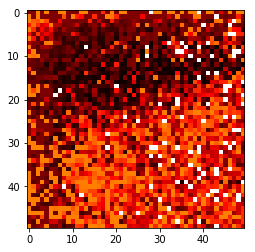

In [29]:
#Running this cell gives a representation of the heat_map. the darker squares represent areas of the lowest error
plt.imshow(heat_map, cmap='hot', interpolation='nearest')
plt.plot()

In [33]:
lowest_error = np.amin(heat_map) #this variable gives the lowest error on the heat_map
best_parameters = parameter_list[np.argmin(heat_map)] #This is a list which gives the parameters used to get the model which 
#gives the lowest_error
best_scale = best_parameters[0]
best_centres = best_parameters[1]

lowest_error


0.20421191205067482

In [54]:
#first lets create our designmatrix using our best parameters, this could lead to a singular matrix due to the randomness of
#of our centre selection, therefore this cell has a small risk of not running

feature_mapping = construct_rbf_feature_mapping(best_centres,best_scale)
designmtx_RBF = feature_mapping(standardised_data) #our design matrix made using the best parameters

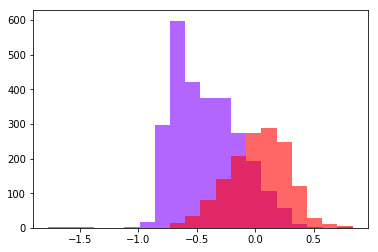

In [55]:
#in this cell we want to plott he histogram this time with our design matrix model to see how linearly seperable our data is
weights = fisher_linear_discriminant_projection(designmtx_RBF, targets) #our weights now calculated using the designmtx_RBF
projected_data = project_data(designmtx_RBF, weights)

plot_class_histograms(projected_data, targets)

plt.show()

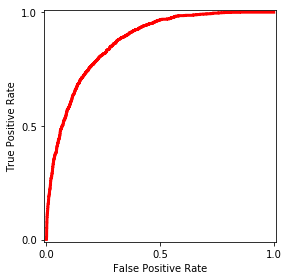

In [32]:

new_ordering = np.argsort(projected_data)
sorted_projections = projected_data[new_ordering]
sorted_targets = targets[new_ordering]

num_neg = np.sum(1-targets)
num_pos = np.sum(targets)

#Below is a 2D array with 5 colums. The array is alled roc_data
#Column 1 is numbers in ascending order (ie 1, 2, 3, 4, 5 etc)
#Column 2 is a value of w0
#Column 3 is the false positive rate (FPR) for a given value of w0
#Column 4 is the true positive rate (TPR) for a given value of 
#Column 5 gives the value of TPR - FPR


roc_data = np.empty([N, 5])

for i, w0 in enumerate(sorted_projections):
        roc_data[i,0] = i
        roc_data[i,1] = sorted_projections[i]
        roc_data[i,2] = np.sum(1-sorted_targets[i:])/num_neg
        FPR = roc_data[i,2]
        roc_data[i,3] = np.sum(sorted_targets[i:])/num_pos
        TPR = roc_data[i,3]
        roc_data[i,4] = TPR - FPR
        
plot_roc(roc_data[:,2], roc_data[:,3])

plt.show()

In [34]:
#Now we will try logistic regression to see if that gives
#A better performance, this will be done without basis functions

from fomlads.model.classification import logistic_regression_prediction_probs
from fomlads.model.classification import logistic_regression_predict
from fomlads.model.classification import logistic_regression_fit
from fomlads.evaluate.eval_classification import cross_entropy_error

def logistic_regression_fit_robustINV(
        inputs, targets, weights0=None, threshold=1e-8, lambd = 0.01):
   
    # reshape the matrix for 1d inputs
    if len(inputs.shape) == 1:
        inputs = inputs.reshape((inputs.size,1))
    N, D = inputs.shape
    inputs = np.matrix(inputs)
    targets = np.matrix(targets.reshape((N,1)))
    # initialise the weights
    if weights0 is None:
        weights = np.matrix(
            np.random.multivariate_normal(np.zeros(D), 0.0001*np.identity(D)))
    else:
        weights = np.matrix(weights0)
    weights = weights.reshape((D,1))
    # initially the update magnitude is set as larger than the threshold
    update_magnitude = 2*threshold
    while update_magnitude > threshold:
        # calculate the current prediction vector for weights
        predicts = logistic_regression_prediction_probs(inputs, weights)
        # the diagonal reweighting matrix (easier with predicts as flat array)
        R = np.matrix(np.diag(predicts*(1-predicts)))
        # reshape predicts to be same form as targets
        predicts = np.matrix(predicts).reshape((N,1))
        #print("Before hessian")
        HessianMTX = inputs.T*R*inputs
        HessianDIM = HessianMTX.shape[0]
        
        #lambdI = np.zeros((HessianDIM, HessianDIM), float)
        #np.fill_diagonal(lambdI, lambd)
        lambdI = lambd*np.identity(HessianDIM)
        robustHessian = HessianMTX + lambdI
                
        #print("Before inverse")
        # Calculate the Hessian inverse
        H_inv = np.linalg.inv(robustHessian)
        # update the weights
        new_weights = weights - H_inv*inputs.T*np.matrix(predicts-targets)
        #print("After update")
        # calculate the update_magnitude
        update_magnitude = np.sqrt(np.sum(np.array(new_weights-weights)**2))
        # update the weights
        weights = new_weights
    return weights

def fit_and_plot_roc_logistic_regression(
        inputs, targets, fig_ax=None, colour=None):
    """
    Takes input and target data for classification and fits shared covariance
    model. Then plots the ROC corresponding to the fit model.

    parameters
    ----------
    inputs - a 2d input matrix (array-like), each row is a data-point
    targets - 1d target vector (array-like) -- can be at most 2 classes ids
        0 and 1
    """
    weights = logistic_regression_fit_robustINV(inputs, targets)
    #
    thresholds = np.linspace(0,1,101)
    N = targets.size
    num_neg = np.sum(1-targets)
    num_pos = np.sum(targets)
    # Comment:
    # There is a good deal of code here that is identical with the function:
    # fit_and_plot_roc_generative, how would you refactor things to ensure the
    # majority is only written once? Consider, a new function with signature:
    # evaluate_and_plot_roc(inputs, prediction_function, thresholds)
    # where prediction_function is a function object that is called with two
    # arguments an input and a threshold. You may need to make use
    # of lambda functions to achieve this though.
    false_positive_rates = np.empty(thresholds.size)
    true_positive_rates = np.empty(thresholds.size)
    for i, threshold in enumerate(thresholds):
        prediction_probs = logistic_regression_prediction_probs(inputs, weights)
        predicts = (prediction_probs > threshold).astype(int)
        num_false_positives = np.sum((predicts == 1) & (targets == 0))
        num_true_positives = np.sum((predicts == 1) & (targets == 1))
        false_positive_rates[i] = np.sum(num_false_positives)/num_neg
        true_positive_rates[i] = np.sum(num_true_positives)/num_pos
    fig, ax = plot_roc(
        false_positive_rates, true_positive_rates, fig_ax=fig_ax, colour=colour)
    # and for the class prior we learnt from the model
    predicts = logistic_regression_predict(inputs, weights)
    fpr = np.sum((predicts == 1) & (targets == 0))/num_neg
    tpr = np.sum((predicts == 1) & (targets == 1))/num_pos
    ax.plot([fpr], [tpr], 'rx', markersize=8, markeredgewidth=2)
    return fig, ax

[]

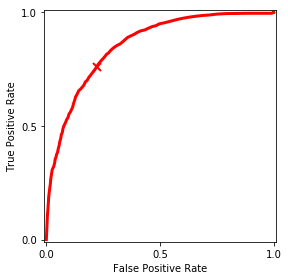

In [35]:
#in this cell we obtain our weights used to create our logistic regression model

fit_and_plot_roc_logistic_regression(standardised_data, targets)

plt.plot()

In [36]:
#In this cell we define the cross validation function for logistic regression

def cross_val_logistic(inputs, targets, folds):
    N = inputs.shape[0] #Number of data points
    num_folds = len(folds) #finds the number of folds
    train_miscl_errors = np.empty(num_folds)
    test_miscl_errors = np.empty(num_folds)
    train_XE_errors = np.empty(num_folds)
    test_XE_errors = np.empty(num_folds)
    for f,fold in enumerate(folds):
        train_part, test_part = fold
        train_inputs, train_targets, test_inputs, test_targets = train_and_test_partition(inputs, targets, train_part, test_part)
        
        weights = logistic_regression_fit_robustINV(train_inputs, train_targets)
        
        train_predicts = logistic_regression_predict(train_inputs, weights)
        test_predicts = logistic_regression_predict(test_inputs, weights)
        
        train_probabilities = logistic_regression_prediction_probs(train_inputs, weights)
        test_probabilities = logistic_regression_prediction_probs(test_inputs, weights)
        
        train_miscl_error = misclassification_error(train_targets, train_predicts)
        test_miscl_error = misclassification_error(test_targets, test_predicts)
        
        train_XE_error = cross_entropy_error(train_targets, train_probabilities)
        test_XE_error = cross_entropy_error(test_targets, test_probabilities)
        
        train_miscl_errors[f] = train_miscl_error
        test_miscl_errors[f] = test_miscl_error
        
        train_XE_errors[f] = train_XE_error
        test_XE_errors[f] = test_XE_error
        
    return train_miscl_errors, test_miscl_errors, train_XE_errors, test_XE_errors

In [37]:
train_errors, test_errors, train_XE, test_XE = cross_val_logistic(standardised_data, targets, folds)
np.mean(test_errors)

0.22791812098258124